In [51]:
import numpy as np
import pickle
import h5py
import matplotlib.pyplot as plt
import numba as nb

In [52]:
#create a covariance matrix based on data at hand
@nb.njit(cache=True)
def covMat(coordinates1, coordinates2, covLambda, covL):

    #Create empty matrix for covariance
    C = np.zeros((len(coordinates1), len(coordinates2)))
    
    #loop over all indices in covariance matrix
    for i in range(len(coordinates1)):
        for j in range(len(coordinates2)):
            #Calculate distance between points
            dist = np.sqrt((coordinates1[i,0] - coordinates2[j,0])**2 + (coordinates1[i,1] - coordinates2[j,1])**2)
            #Determine each element of covariance matrix
            C[i, j] = (covLambda**2)*(np.exp(((-1)*((dist)**2))/(covL**2)))

    #Return Covariance Matrix
    return C

In [7]:
# Read the CSV file, considering the header
data = np.genfromtxt('C:/Users/vkuma/Research/Data/SyntheticData/syntheticData_20230712_062914/data.csv', delimiter=', ', skip_header=1)

# Separate columns into individual arrays
dataVectIndex = data[:, 0]
dataVect = data[:, 1:]
    
#make pixel adjustment to nanometers
dataVect = dataVect[::]*1
dataVectIndex = dataVectIndex[::]
    
#put time step manually as unavailable from data file
deltaT = 1/30

In [15]:
noisyData = 3.75*np.random.standard_normal(np.shape(dataVect))+dataVect

In [36]:
#Points of trajectory where learning is possible
nData = len(noisyData)
dataCoordinates = np.empty((0,2))
for i in range(nData-1):
    if (dataVectIndex[i] == dataVectIndex[i+1]):
        dataCoordinates = np.vstack((dataCoordinates, dataVect[i]))

#Points of trajectory that are "sampled"
sampleCoordinates = np.empty((0,2))
for i in range(1,nData):
    if (dataVectIndex[i] == dataVectIndex[i-1]):
        sampleCoordinates = np.vstack((sampleCoordinates, dataVect[i]))

In [26]:
np.mean(np.abs(dataCoordinates-sampleCoordinates))

32.82911987954306

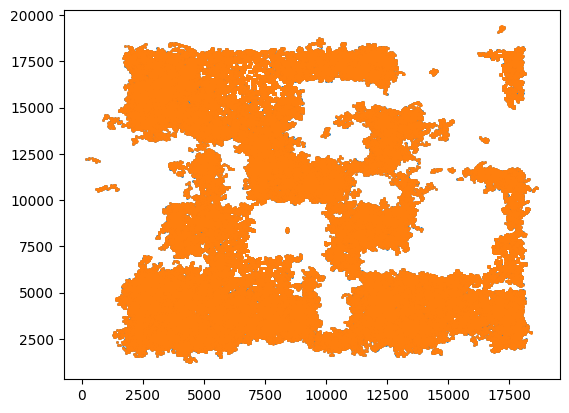

In [16]:
plt.scatter(dataVect[:, 0], dataVect[:, 1], s = 1)
plt.scatter(noisyData[:, 0], noisyData[:, 1], s = 1)